### Import necessary packages and the data for this analysis

In [2]:
import tensorflow as tf
from keras.datasets import imdb

Using TensorFlow backend.


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras.preprocessing import sequence

In [4]:
vocab_size = 10002 # only consider the top 10,000 ranked words 
# note: prints 2 when the number is over 10,000

(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

print('We have imported {} IMDB movie reviews, comprising {} training samples and {} test samples'.format(len(train_data)+len(test_data), len(train_data), len(test_data)))

We have imported 50000 IMDB movie reviews, comprising 25000 training samples and 25000 test samples


### Exploratory data analysis

In [5]:
# combine data sets for exploratory data analysis and producing dictionary
data = np.concatenate((train_data, test_data), axis=0)
labels = np.concatenate((train_labels, test_labels), axis=0)

print('We have {} positive and {} negative reviews'.format(sum(labels), 50000 - sum(labels)))

print('Categories are: {}'.format(np.unique(labels)))
print('Number of unique words in our vocabulary: {}'.format(len(np.unique(np.hstack(data)))))

review_lengths = [len(data[i]) for i in data]
review_lengths = sorted(review_lengths)
average_length = sum(review_lengths) / len(data)
median_length = review_lengths[len(review_lengths)//2]
total_number_of_words = sum(review_lengths)

print('Mean review length is: {}'.format(average_length))
print('Average review length is: {}'.format(median_length))
print('Maximum review length is: {}'.format(max(review_lengths)))
print('Minimum review length is: {}'.format(min(review_lengths)))
print('Total number of words: {}'.format(total_number_of_words))


print('Standard deviation of review lengths is: {}'.format(np.std(review_lengths)))
# Reviews are on average within 173 of the mean 235

count = []
for k in range(1,4):
    klist = []
    for j in range(len(data)):
        for i in range(len(data[j])):
            if data[j][i] == k:
                klist.append([j,i])
    count.append(klist)
    
# 1 is used for the start of every review
print('1 is used {} times'.format(len(count[0])))
# 2 is used when the word is outside of range
print('2 is used {} times'.format(len(count[1])))
# 3 is never used  
print('3 is used {} times'.format(len(count[2])))

We have 25000 positive and 25000 negative reviews
Categories are: [0 1]
Number of unique words in our vocabulary: 10000
Mean review length is: 234.75892
Average review length is: 176
Maximum review length is: 2494
Minimum review length is: 7
Total number of words: 11737946
Standard deviation of review lengths is: 172.91149458735703
1 is used 50000 times
2 is used 638540 times
3 is used 0 times


lower quartile is 129.0
upper quartile is 285.0
Interquartile range is 156.0
Upper whisker is 519.0


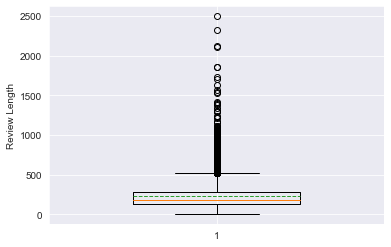

In [128]:
# Figure 12 a
boxplot1 = plt.boxplot(review_lengths, widths = 0.5, showmeans=True, meanline=True)
plt.ylabel("Review Length")
plt.xlabel("")
plt.savefig('boxplot.png')


lower_quartile = np.percentile(review_lengths, 25)
print('lower quartile is', lower_quartile)
upper_quartile = np.percentile(review_lengths, 75)
print('upper quartile is', upper_quartile)
print('Interquartile range is', upper_quartile - lower_quartile)
print('Upper whisker is', upper_quartile + 1.5*(upper_quartile - lower_quartile))

# From the boxplot of the review lengths we can observe an exponential distribution 
# 50% of reviews are between 129 and 285 words
# We can cover the mass of the distribution with a shorter review length 
# Thus it makes sense to only consider 500 words of each review

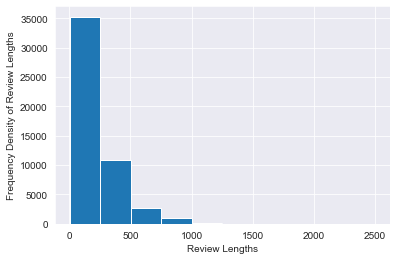

In [129]:
# Figure 12 b
histogram = plt.hist(review_lengths)
plt.ylabel("Frequency Density of Review Lengths")
plt.xlabel("Review Lengths")
plt.savefig('histogram.png')

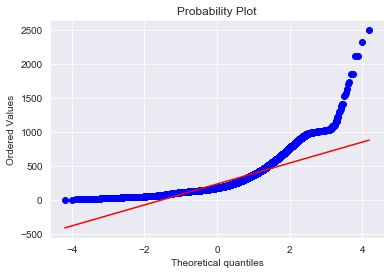

In [130]:
import pylab 
import scipy.stats as stats
stats.probplot(review_lengths, dist="norm", plot=pylab)
pylab.show()
# review lengths are not normally distributed 

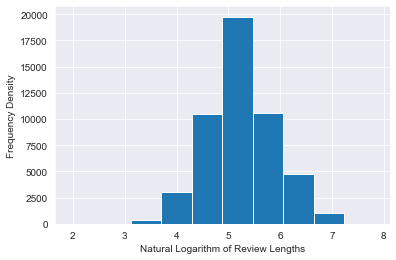

In [131]:
# Figure 13 a
from math import log
log_review_lengths = [log(len(data[i])) for i in data]

histogram = plt.hist(log_review_lengths)
plt.ylabel("Frequency Density")
plt.xlabel("Natural Logarithm of Review Lengths")
plt.savefig('log_histogram.png')
# log of review lengths looks normally distributed

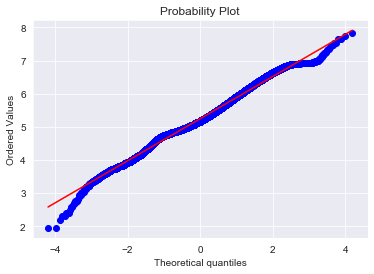

In [132]:
# Figure 13 b
stats.probplot(log_review_lengths, dist="norm", plot=pylab)
pylab.show()
# QQ-norm plot confirms we have log normal distribution of review lengths  

45967
194.84482346030848
166
49829
lower quartile is 126.0
upper quartile is 247.0
Interquartile range is 121.0
Upper whisker is 428.5


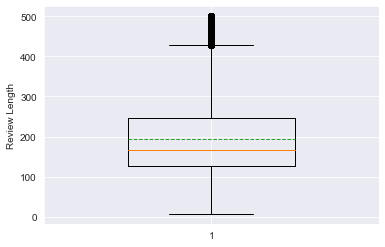

In [133]:
# Figure 12 c
# boxplot of review lengths when limited to 500 words

shorter_review_lengths = []
for i in range(len(review_lengths)):
    if review_lengths[i] <= 500:
        shorter_review_lengths.append(review_lengths[i])
print(len(shorter_review_lengths))
#45967 under 500 words
print(sum(shorter_review_lengths)/45967)
print(shorter_review_lengths[45967//2])
under1000 = []
for i in range(len(review_lengths)):
    if review_lengths[i] <= 1000:
        under1000.append(review_lengths[i])
print(len(under1000))
#49829 under 

lower_quartile = np.percentile(shorter_review_lengths, 25)
print('lower quartile is', lower_quartile)
upper_quartile = np.percentile(shorter_review_lengths, 75)
print('upper quartile is', upper_quartile)
print('Interquartile range is', upper_quartile - lower_quartile)
print('Upper whisker is', upper_quartile + 1.5*(upper_quartile - lower_quartile))



boxplot2 = plt.boxplot(shorter_review_lengths, widths = 0.5, showmeans=True, meanline=True)
plt.ylabel("Review Length")
plt.xlabel("")
plt.savefig('shorterboxplot.png')
plt.show(boxplot2)

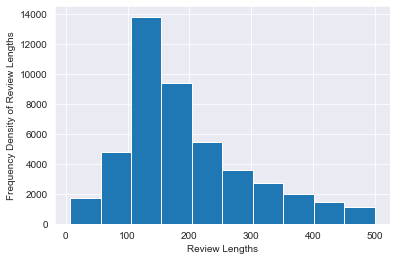

In [134]:
# Figure 12 d
# histogram of review lenghts when limited to 500 words

histogram = plt.hist(shorter_review_lengths)
plt.ylabel("Frequency Density of Review Lengths")
plt.xlabel("Review Lengths")
plt.savefig('shorter_histogram.png')

In [7]:
# Define Dictionary WR
word_dictionary = tf.keras.datasets.imdb.get_word_index(path="imdb_word_index.json")
# Define Dictionary RW
index_2_word = dict( [(rank, word) for (word, rank) in word_dictionary.items()] ) 

# test conversion for a review
print(data[16])
print(data[16][1])
print(word_dictionary['laputa']) #7089
# the second word of the review has rank 7089 but it appears as 7092 in the data so we must subtract 3 from each element

sample_review = " ".join( [index_2_word.get(i-3, "#") for i in data[16]] ) # i-3 as index is misaligned

print(sample_review)

[1, 7092, 1662, 11, 4, 1749, 9, 4, 2165, 4, 749, 9, 17, 565, 17, 27, 5954, 495, 5, 53, 1050, 777, 5, 1549, 6987, 89, 100, 12, 30, 101, 128, 4, 498, 9, 484, 480, 5, 4, 816, 63, 9, 2, 111, 211, 103, 14, 4604, 24, 252, 48, 14, 16, 4, 86, 58, 13, 557, 12, 5, 7630, 11, 72, 4, 91, 921, 3178, 3639, 7, 101, 20, 816, 2, 4, 668, 485, 11, 14, 20, 9, 484, 1190, 5, 4, 430, 2, 9, 82, 6, 87, 217, 2186, 29, 456, 23, 27, 205, 4, 114, 9, 356, 7302, 13, 528, 202, 12, 245, 21, 4, 130, 9, 66, 87, 13, 4222, 14, 17, 31, 7, 9263, 289, 118, 19, 2, 5, 3649, 245, 82, 25, 203, 181, 8, 808, 46, 2, 728, 1662, 54, 12, 266, 46, 6115, 375, 291, 13, 440, 48, 25, 40, 7302, 808, 14, 31, 46, 17, 12, 6918, 1439, 11, 4, 2997, 358, 2, 6]
7092
7089
# laputa castle in the sky is the bomb the message is as strong as his newer works and more pure fantastic and flying pirates how could it be any better the art is totally amazing and the soundtrack which is # many times after this im not sure if this was the first time i heard it 

In [67]:
print(max(word_dictionary.values()))
print(index_2_word[10000])
print(index_2_word[88000])
freq=[]
for k in range(10000,10001):
    x=0
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == k:
                x+=1
    freq.append(x)
print(freq)

88584
approved
salmonella
[66]


In [10]:
review_lengthz = [len(data[i]) for i in data]
print(review_lengthz.index(max(review_lengthz)))
#index of longest review 17934
print(review_lengthz.index(min(review_lengthz)))
#index shortest review 27104


print(sum(review_lengths))

sample_review = " ".join( [index_2_word.get(i-3, "#") for i in data[27104]] )
print(sample_review)
labels[27104]

17934
27104
11737946
# read the book forget the movie


0

In [29]:
# this function will tell you which word a specific index refers to and will print '#' if it is not in the dictionary
# index 0 encodes unknown words as #
top_words =  []
for i in range(1,21):
    top_words.append(index_2_word.get(i, "#"))
    print(i,':', index_2_word.get(i, "#"))

1 : the
2 : and
3 : a
4 : of
5 : to
6 : is
7 : br
8 : in
9 : it
10 : i
11 : this
12 : that
13 : was
14 : as
15 : for
16 : with
17 : movie
18 : but
19 : film
20 : on


In [30]:
# function to find the word frequencies of top 20 words
# note that index starts from 4, i.e. 'the' is denoted by 4 not 1 
freq=[]
for k in range(4,24):
    x=0
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == k:
                x+=1
    freq.append(x)
freq

[666757,
 324337,
 322800,
 289379,
 268079,
 211041,
 201951,
 186690,
 156801,
 154887,
 150941,
 136986,
 95585,
 91730,
 87450,
 87350,
 87050,
 83495,
 77678,
 68015]

In [31]:
# find the percentage that each of the top 20 words make up
percentages = []
for i in range(len(freq)):
    percentages.append(100*(freq[i]/sum(review_lengths)))

print(percentages)
sum(percentages)
#top 20 words make up 31.9% of all the words in the reviews

[5.680354978630843, 2.763149532294662, 2.750055248166928, 2.465329112947018, 2.2838663595828432, 1.7979380719590974, 1.7204969251008653, 1.5904826960355758, 1.3358470042373682, 1.3195409145688692, 1.2859234486169897, 1.1670355273401327, 0.8143247549443489, 0.7814825523988609, 0.7450196141641817, 0.7441676763549603, 0.7416118629272958, 0.7113254738094723, 0.661768251447059, 0.5794455009419877]


31.939165506469354

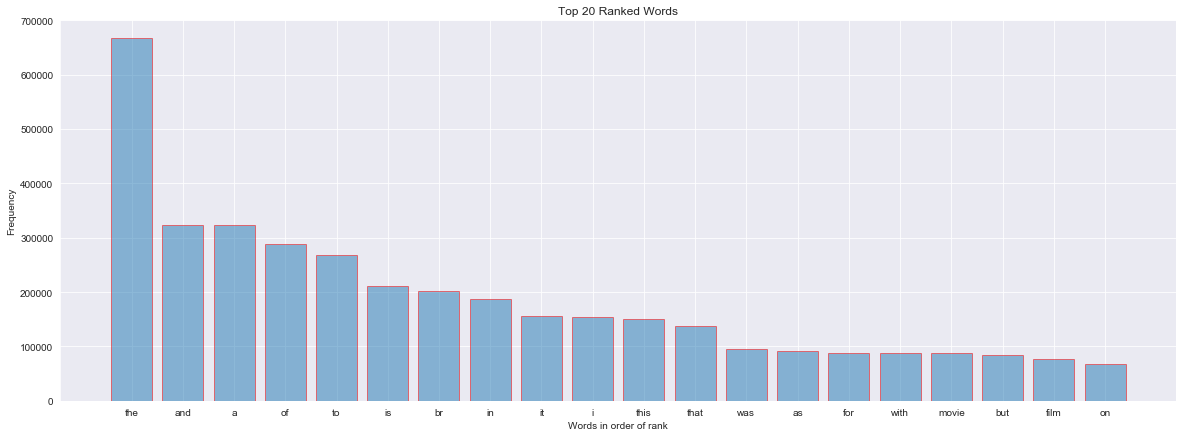

In [136]:
# Figure 14
y_pos = np.arange(len(freq))
plt.figure(figsize = (20,7))
plt.bar(y_pos, freq, align='center', alpha=0.5, edgecolor='red')
plt.xticks(y_pos, top_words)
plt.ylabel('Frequency')
plt.xlabel('Words in order of rank')
plt.title('Top 20 Ranked Words')
plt.savefig('top20wordranks.png')

50 : more
51 : when
52 : very
53 : up
54 : no
55 : time
56 : she
57 : even
58 : my
59 : would
60 : which
61 : only
62 : story
63 : really
64 : see
65 : their
66 : had
67 : can
68 : were
69 : me
70 : well


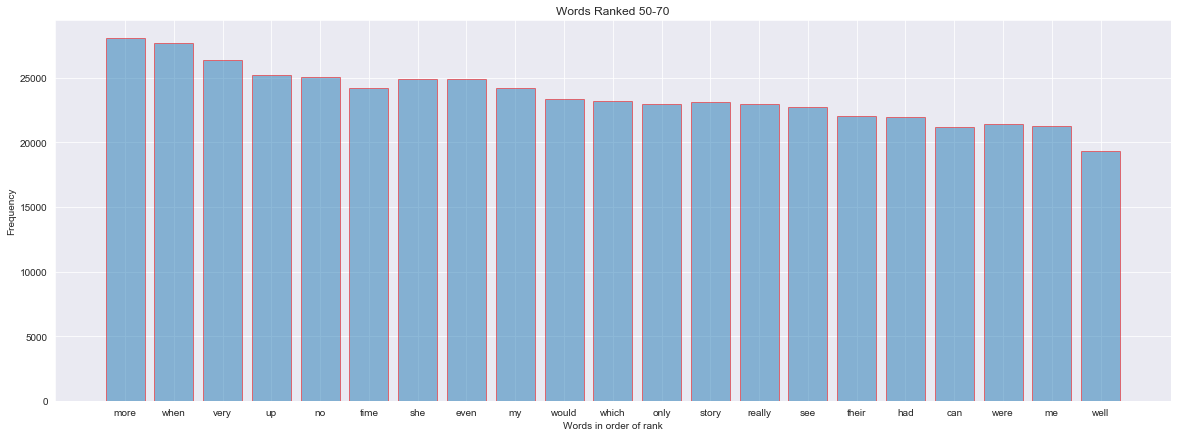

In [137]:
# bar chart of word ranks for 50-70

other_words =  []
for i in range(50,71):
    other_words.append(index_2_word.get(i, "#"))
    print(i,':', index_2_word.get(i, "#"))
    
freq2=[]
for k in range(54,75):
    x=0
    for i in range(len(data)):
        for j in range(len(data[i])):
            if data[i][j] == k:
                x+=1
    freq2.append(x)

y_pos2 = np.arange(len(freq2))
plt.figure(figsize = (20,7))
plt.bar(y_pos2, freq2, align='center', alpha=0.5, edgecolor='red')
plt.xticks(y_pos2, other_words)
plt.ylabel('Frequency')
plt.xlabel('Words in order of rank')
plt.title('Words Ranked 50-70')
plt.savefig('50_70wordranks.png')

In [138]:
# show the first 10 words to know what the most frequent words of the dataset are
# index/word mapping

index_arr = sorted(word_dictionary, key=word_dictionary.get)
index_arr[:10] # first 10 words

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

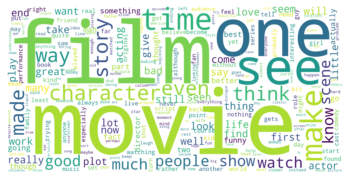

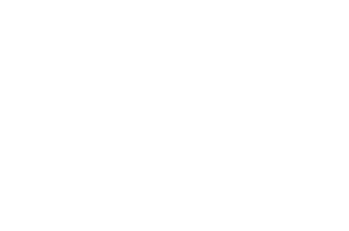

In [139]:
# Figure 15
from wordcloud import WordCloud, STOPWORDS 

# function to convert numerical reviews into word reviews
film_reviews = []
for i in range(len(data)): 
    for j in data[i]: 
        film_reviews.append(index_2_word.get(j-3, "#"))



# Get the text and join all the reviews in training set
text = ' '.join(film_reviews) 

# limit the word count and set the stopwords
wordcount = 500
stopwords = set(STOPWORDS)
stopwords.add("br")

# setup, generate and save the word cloud image to a file
wc = WordCloud(scale=5, 
               background_color="white", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)
wc.to_file("WordCloud.png")

# show the wordcloud as output
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

### Model 4: same as Model 1 but without Word2Vec word embedding

In [38]:
# vectorise every review and make all reviews the same length (500), reviews shorter than 500 will be filled (padded) with 0s
max_words = 500
train_data_pad = sequence.pad_sequences(train_data, maxlen=max_words)
test_data_pad = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

embedding_size=32
model_simple=Sequential()
model_simple.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model_simple.add(SimpleRNN(100))
model_simple.add(Dense(1, activation='sigmoid'))

print(model_simple.summary())

model_simple.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 500
num_epochs = 10

valid_data, valid_labels = train_data_pad[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data_pad[batch_size:], train_labels[batch_size:]

history = model_simple.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           320064    
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 333,465
Trainable params: 333,465
Non-trainable params: 0
_________________________________________________________________
None
Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 30s 1ms/step - loss: 0.6885 - acc: 0.5432 - val_loss: 0.6785 - val_acc: 0.6220
Epoch 2/10
24500/24500 [==============================] - 27s 1ms/step - loss: 0.5936 - acc: 0.7136 - val_loss: 0.5291 - val_acc: 0.7440
Epoch 3/10
24500/24500 [==============================] - 27s 1ms/step - 

In [39]:
scores = model_simple.evaluate(test_data_pad, test_labels, verbose=0)
print('Test Accuracy:', scores[1])
# average testing accuracy
print('Average Test Accuracy:', (0.8384+0.85696+0.82584+0.85588+0.84427)/5)

Test Accuracy: 0.83076
Average Test Accuracy: 0.8442700000000001


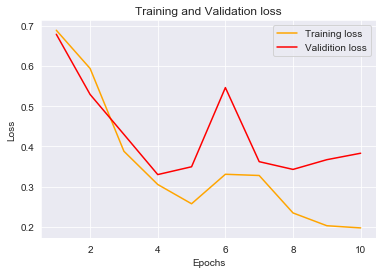

In [40]:
history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1,len(acc) + 1)


plt.plot(epochs,loss_value, 'orange', label='Training loss')
plt.plot(epochs,val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

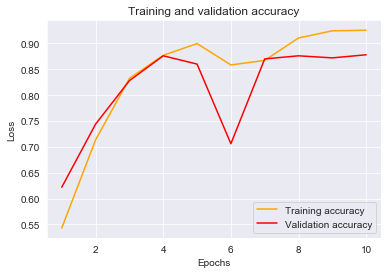

In [41]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# indicates over fitting as 
# train loss < validation loss
# train accuracy > validation accuracy

In [42]:
# Benchmark Reviews
max_words = 500
#sarcasm
test_review1 = ['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
test_review2 = ['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
#negation handling
test_review3 = ['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
test_review4 = ['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
test_review5 = ['i', 'do', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
test_review6 = ['i', 'do', 'not', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
#ambiguous language
test_review7 = ['strange', 'characters', 'and', 'a', 'unique', 'story', 'line', 'one', 'of', 'the', 'more', 'questionable', 'films', 'but', 'still', 'entertaining']
test_review8 = ['a', 'typical', 'action', 'film', 'with', 'a', 'predictable', 'storyline']
#slang
test_review9 = ['omg', 'it', 'was', 'a', 'sick', 'film', 'the', 'acting', 'was', 'on', 'point', 'and', 'i', 'was', 'shook', 'at', 'the', 'ending']
test_review10 = ['wow', 'this', 'film', 'really', 'sucked', 'sorry', 'but', 'got', 'to', 'be', 'brutal']


test_reviews = [test_review1, test_review2, test_review3, test_review4, test_review5, test_review6, test_review7, test_review8, test_review9, test_review10]

def sentence_2_sequence(sentence): #function to convert sentences of words to a vector containing their word ranks 
    sequence = []
    for word in sentence:
        if word_dictionary[word] < 10000: # so we don't include words ranked lower than 10,000
            sequence.append(word_dictionary[word]+3) #due to misalignment need to add 3 to the index 
    return(np.array(sequence))

def pad_sequence(x): 
    padded_seq = sequence.pad_sequences(x, maxlen=max_words) # makes sequences length 500
    return(padded_seq)

review1_sequence = sentence_2_sequence(test_review1)
review2_sequence = sentence_2_sequence(test_review2)
review3_sequence = sentence_2_sequence(test_review3)
review4_sequence = sentence_2_sequence(test_review4)
review5_sequence = sentence_2_sequence(test_review5)
review6_sequence = sentence_2_sequence(test_review6)
review7_sequence = sentence_2_sequence(test_review7)
review8_sequence = sentence_2_sequence(test_review8)
review9_sequence = sentence_2_sequence(test_review9)
review10_sequence = sentence_2_sequence(test_review10)

reviews = [review1_sequence, review2_sequence, review3_sequence, review4_sequence, review5_sequence, review6_sequence, review7_sequence, review8_sequence, review9_sequence, review10_sequence]
test_reviews_converted = pad_sequence(reviews)


x=test_reviews_converted[:batch_size]
results = model_simple.predict(x)

for i in range(len(results)):
    # since values close to 0 have negative sentiment
    if results[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.2 <= results[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.8 <= results[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results[i])
        

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has very negative sentiment
Model prediction = [0.06554019]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has very negative sentiment
Model prediction = [0.14180967]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has very negative sentiment
Model prediction = [0.01934814]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has very negative sentiment
Model prediction = [0.02632982]
Film review 5 :
['i', 'do', 'think', 'this',

### Same as Model 4 but with 1000 word limit instead of 500 (not included in report)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 32)          320064    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 333,465
Trainable params: 333,465
Non-trainable params: 0
_________________________________________________________________
None
Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 146s 6ms/step - loss: 0.6904 - acc: 0.5293 - val_loss: 0.6817 - val_acc: 0.5420
Epoch 2/10
24500/24500 [==============================] - 141s 6ms/step - loss: 0.6487 - acc: 0.6433 - val_loss: 0.6509 - val_acc: 0.5940
Epoch 3/10
24500/24500 [==============================] - 125s 5ms/step

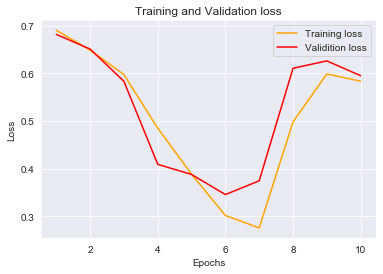

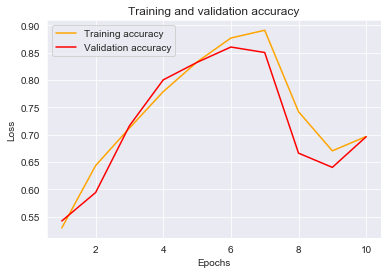

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has positive sentiment
Model prediction = [0.56630474]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has positive sentiment
Model prediction = [0.5546753]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has positive sentiment
Model prediction = [0.5539516]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has positive sentiment
Model prediction = [0.56254184]
Film review 5 :
['i', 'do', 'think', 'this', 'was', 'a', 'very', '

In [37]:
# vectorise every review and make all reviews the same length (500), reviews shorter than 500 will be filled (padded) with 0s
max_words = 1000
train_data_pad = sequence.pad_sequences(train_data, maxlen=max_words)
test_data_pad = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout

embedding_size=32
model_simple1000=Sequential()
model_simple1000.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model_simple1000.add(SimpleRNN(100))
model_simple1000.add(Dense(1, activation='sigmoid'))

print(model_simple1000.summary())

model_simple1000.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 500
num_epochs = 10

valid_data, valid_labels = train_data_pad[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data_pad[batch_size:], train_labels[batch_size:]

history = model_simple1000.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

# Test Accuracy
scores = model_simple1000.evaluate(test_data_pad, test_labels, verbose=0)
print('Test accuracy:', scores[1])
print('Average Test Accuracy:',(0.83272)/1)

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1,len(acc) + 1)


plt.plot(epochs,loss_value, 'orange', label='Training loss')
plt.plot(epochs,val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# indicates over fitting as 
# train loss < validation loss
# train accuracy > validation accuracy

# Benchmark Reviews
#sarcasm
test_review1 = ['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
test_review2 = ['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
#negation handling
test_review3 = ['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
test_review4 = ['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
test_review5 = ['i', 'do', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
test_review6 = ['i', 'do', 'not', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
#ambiguous language
test_review7 = ['strange', 'characters', 'and', 'a', 'unique', 'story', 'line', 'one', 'of', 'the', 'more', 'questionable', 'films', 'but', 'still', 'entertaining']
test_review8 = ['a', 'typical', 'action', 'film', 'with', 'a', 'predictable', 'storyline']
#slang
test_review9 = ['omg', 'it', 'was', 'a', 'sick', 'film', 'the', 'acting', 'was', 'on', 'point', 'and', 'i', 'was', 'shook', 'at', 'the', 'ending']
test_review10 = ['wow', 'this', 'film', 'really', 'sucked', 'sorry', 'but', 'got', 'to', 'be', 'brutal']


test_reviews = [test_review1, test_review2, test_review3, test_review4, test_review5, test_review6, test_review7, test_review8, test_review9, test_review10]

def sentence_2_sequence(sentence): #function to convert sentences of words to a vector containing their word ranks 
    sequence = []
    for word in sentence:
        if word_dictionary[word] < 10000: # so we don't include words ranked lower than 10,000
            sequence.append(word_dictionary[word]+3) #due to misalignment need to add 3 to the index 
    return(np.array(sequence))

def pad_sequence(x): 
    padded_seq = sequence.pad_sequences(x, maxlen=max_words) # makes sequences length 500
    return(padded_seq)

review1_sequence = sentence_2_sequence(test_review1)
review2_sequence = sentence_2_sequence(test_review2)
review3_sequence = sentence_2_sequence(test_review3)
review4_sequence = sentence_2_sequence(test_review4)
review5_sequence = sentence_2_sequence(test_review5)
review6_sequence = sentence_2_sequence(test_review6)
review7_sequence = sentence_2_sequence(test_review7)
review8_sequence = sentence_2_sequence(test_review8)
review9_sequence = sentence_2_sequence(test_review9)
review10_sequence = sentence_2_sequence(test_review10)

reviews = [review1_sequence, review2_sequence, review3_sequence, review4_sequence, review5_sequence, review6_sequence, review7_sequence, review8_sequence, review9_sequence, review10_sequence]
test_reviews_converted = pad_sequence(reviews)


x=test_reviews_converted[:batch_size]
results = model_simple1000.predict(x)

for i in range(len(results)):
    # since values close to 0 have negative sentiment
    if results[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.2 <= results[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.8 <= results[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results[i])

### LSTM without Word2Vec embedding (not used in project)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 500, 32)           320064    
_________________________________________________________________
lstm_4 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 101       
Total params: 373,365
Trainable params: 373,365
Non-trainable params: 0
_________________________________________________________________
None
Train on 24488 samples, validate on 512 samples
Epoch 1/10
24488/24488 [==============================] - 171s 7ms/step - loss: 0.6079 - acc: 0.6714 - val_loss: 0.3726 - val_acc: 0.8613
Epoch 2/10
24488/24488 [==============================] - 151s 6ms/step - loss: 0.5019 - acc: 0.7677 - val_loss: 0.5723 - val_acc: 0.7031
Epoch 3/10
24488/24488 [==============================] - 156s 6ms/step

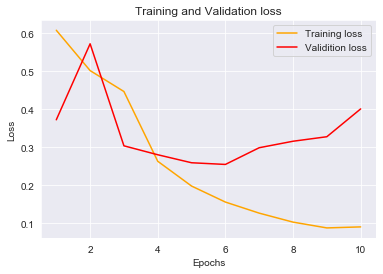

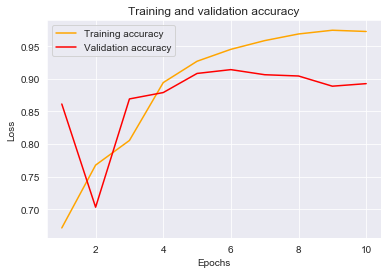

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has positive sentiment
Model prediction = [0.74603724]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has positive sentiment
Model prediction = [0.78302765]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has positive sentiment
Model prediction = [0.5718171]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has negative sentiment
Model prediction = [0.4174779]
Film review 5 :
['i', 'do', 'think', 'this', 'was', 'a', 'very', '

In [159]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
max_words = 500
train_data_pad = sequence.pad_sequences(train_data, maxlen=max_words)
test_data_pad = sequence.pad_sequences(test_data, maxlen=max_words)

embedding_size=32
model=Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=max_words))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

print(model.summary())

model.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 512
num_epochs = 10

valid_data, valid_labels = train_data_pad[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data_pad[batch_size:], train_labels[batch_size:]

history = model.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

scores = model.evaluate(test_data_pad, test_labels, verbose=0)
print('Test accuracy:', scores[1])

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1,len(acc) + 1)


plt.plot(epochs,loss_value, 'orange', label='Training loss')
plt.plot(epochs,val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


x=test_reviews_converted[:batch_size]
results = model.predict(x)

for i in range(len(results)):
    # since values close to 0 have negative sentiment
    if results[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.2 <= results[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.8 <= results[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results[i])

### Word2Vec word embedding (Skip-Gram method)

In [47]:
#re-import the data
(w2vtrain_data, w2vtrain_labels), (w2vtest_data, w2vtest_labels) = tf.keras.datasets.imdb.load_data(num_words=100000)
w2vdata = np.concatenate((w2vtrain_data, w2vtest_data), axis=0)
len(np.unique(np.hstack(w2vdata)))

88585

In [48]:
import gensim
import os
embedding_size=32

#create list of all words in all reviews, with a separate list for each review so there is not an overlap 
film_reviews = []
for i in range(len(w2vdata)): 
    film_reviews.append([])
    for j in w2vdata[i]: 
        film_reviews[i].append(index_2_word.get(j-3, "#"))

np.shape(film_reviews)
film_reviews[2]

['#',
 'this',
 'has',
 'to',
 'be',
 'one',
 'of',
 'the',
 'worst',
 'films',
 'of',
 'the',
 '1990s',
 'when',
 'my',
 'friends',
 'i',
 'were',
 'watching',
 'this',
 'film',
 'being',
 'the',
 'target',
 'audience',
 'it',
 'was',
 'aimed',
 'at',
 'we',
 'just',
 'sat',
 'watched',
 'the',
 'first',
 'half',
 'an',
 'hour',
 'with',
 'our',
 'jaws',
 'touching',
 'the',
 'floor',
 'at',
 'how',
 'bad',
 'it',
 'really',
 'was',
 'the',
 'rest',
 'of',
 'the',
 'time',
 'everyone',
 'else',
 'in',
 'the',
 'theatre',
 'just',
 'started',
 'talking',
 'to',
 'each',
 'other',
 'leaving',
 'or',
 'generally',
 'crying',
 'into',
 'their',
 'popcorn',
 'that',
 'they',
 'actually',
 'paid',
 'money',
 'they',
 'had',
 'earnt',
 'working',
 'to',
 'watch',
 'this',
 'feeble',
 'excuse',
 'for',
 'a',
 'film',
 'it',
 'must',
 'have',
 'looked',
 'like',
 'a',
 'great',
 'idea',
 'on',
 'paper',
 'but',
 'on',
 'film',
 'it',
 'looks',
 'like',
 'no',
 'one',
 'in',
 'the',
 'film',
 '

In [49]:
# prepare data for training Word2Vec model
# remove punctuation, non-alphabetic characters and stop words from data
import string
from nltk.corpus import stopwords
w2v_film_reviews=[]
w2v_film_reviews2=[]

for review in film_reviews:
    #remove punctuation
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in review]
    #remove non-alphabetic 
    words = [word for word in stripped if word.isalpha()]
    w2v_film_reviews.append(words)
    #remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    #append to review list
    w2v_film_reviews2.append(words)
    
    
    
print(len(stop_words))
print('Stop Words:')
print(stop_words)
print('Review:')
print(film_reviews[2])
print('Review without punctuation and non-alphabetic:')
print(w2v_film_reviews[2])
print('Review without punctuation and non-alphabetic and stop words:')
print(w2v_film_reviews2[2])

179
Stop Words:
{'through', 'up', 'mightn', 'own', 'she', 'herself', 'as', 'any', 'again', 'its', 'if', 'while', 'off', 'a', "you'll", 'so', 'we', 'couldn', 'above', 'over', "doesn't", 'myself', 'it', 'that', 'such', 'about', 'there', 'why', 'isn', 'but', 'itself', 'from', 'just', "hadn't", 'their', "wouldn't", 'once', "mustn't", 'against', 'me', 'who', 'an', 'have', 'now', 're', "wasn't", 'more', 'here', 'his', 'all', 'to', 'haven', 'd', 'by', 'needn', 'too', "aren't", 'll', "you've", 'yourself', "it's", 'should', 'didn', 'mustn', "weren't", 'because', 'some', 'in', 'during', 'not', "shan't", 'do', 'aren', 'what', 'themselves', 'is', 'being', 'nor', 'how', 'our', 'weren', 'below', 'then', 'was', 'into', 'he', 'can', 'at', 'your', "you're", 'you', 'and', "didn't", 'than', 'were', 'other', 'where', 've', 'between', "isn't", "mightn't", 'only', 'm', 'or', 'down', "couldn't", 'few', 'before', 'has', 'this', 'been', 'those', 'very', 'him', 'until', 'don', 'hasn', 'are', 'under', "haven't",

In [19]:
# implement Skip-Gram method
Word2Vec_model = gensim.models.Word2Vec(sentences=w2v_film_reviews, size = embedding_size, window=5, min_count=1, max_vocab_size=None, sg=1)
#define sg=1 to use skipgram instead of CBOW

In [20]:
# store word vectors 
word_vectors = Word2Vec_model.wv
words = list(Word2Vec_model.wv.vocab)
#word_vectors['film']
print(len(words))
filename = 'word2vec_imdb.txt'
Word2Vec_model.wv.save_word2vec_format(filename, binary=False)

77746


### Evaluation of the quality of word vectors

In [77]:
Word2Vec_model.most_similar('happy')

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('wary', 0.8557019233703613),
 ('forgiving', 0.8533793687820435),
 ('excited', 0.8333733081817627),
 ('pleasant', 0.8303647041320801),
 ('thrilled', 0.8296564221382141),
 ('still', 0.8276920318603516),
 ('yknow', 0.8269453048706055),
 ('sadder', 0.8253238797187805),
 ('lucky', 0.8250827193260193),
 ('delighted', 0.824951171875)]

In [79]:
Word2Vec_model.most_similar('film')

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('movie', 0.9515331983566284),
 ('defiantly', 0.9001936912536621),
 ('this', 0.897813618183136),
 ('picture', 0.8868567943572998),
 ('altogether', 0.8856326341629028),
 ('filmaking', 0.8786983489990234),
 ('documentary', 0.8780282139778137),
 ('component', 0.8776212334632874),
 ('it', 0.8760436177253723),
 ('fairness', 0.8759092092514038)]

In [80]:
Word2Vec_model.most_similar('watch')

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('enjoy', 0.9299720525741577),
 ('guarantee', 0.9095231294631958),
 ('see', 0.891101062297821),
 ('rent', 0.8815041780471802),
 ('revisit', 0.8727675676345825),
 ('recommend', 0.8704408407211304),
 ('sit', 0.8703204393386841),
 ('buy', 0.863905668258667),
 ('rewatch', 0.8626891374588013),
 ('recomend', 0.8587965965270996)]

In [81]:
Word2Vec_model.most_similar('the')

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('which', 0.8796463012695312),
 ('arnolds', 0.8788156509399414),
 ('in', 0.8684724569320679),
 ('only', 0.8635333776473999),
 ('of', 0.8597785830497742),
 ('another', 0.8594584465026855),
 ('whole', 0.859123945236206),
 ('th', 0.8568277359008789),
 ('particular', 0.8563323020935059),
 ('same', 0.8560510873794556)]

In [82]:
Word2Vec_model.most_similar('dinosaur')

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('monster', 0.902680516242981),
 ('monkey', 0.8912288546562195),
 ('bigfoot', 0.889866292476654),
 ('giant', 0.8861631751060486),
 ('shark', 0.8858380317687988),
 ('spider', 0.8810782432556152),
 ('toy', 0.8778520822525024),
 ('scarecrow', 0.8778172135353088),
 ('boggy', 0.8753882646560669),
 ('sabretooth', 0.87456214427948)]

In [83]:
Word2Vec_model.most_similar(positive=['hero','woman'], negative=['man'])

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('heroine', 0.9538917541503906),
 ('protagonist', 0.868563711643219),
 ('nurse', 0.8349332809448242),
 ('victim', 0.8249096870422363),
 ('outcast', 0.813732385635376),
 ('politician', 0.8104996085166931),
 ('villian', 0.8050119876861572),
 ('spinster', 0.7999435663223267),
 ('interrogator', 0.7958757281303406),
 ('zandalee', 0.7936478853225708)]

In [84]:
Word2Vec_model.most_similar_cosmul(positive=['time', 'money'], negative=['adventure'])

C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar_cosmul` (Method will be removed in 4.0.0, use self.wv.most_similar_cosmul() instead).
  """Entry point for launching an IPython kernel.


[('nerves', 1.20209801197052),
 ('bills', 1.2000291347503662),
 ('wasting', 1.1878501176834106),
 ('lungs', 1.1736981868743896),
 ('cost', 1.1691645383834839),
 ('spent', 1.1637260913848877),
 ('refund', 1.1620763540267944),
 ('paid', 1.1584645509719849),
 ('medication', 1.1505502462387085),
 ('robbed', 1.1491831541061401)]

In [85]:
print(Word2Vec_model.doesnt_match('fight violent happy gore'.split()))

happy


C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  """Entry point for launching an IPython kernel.
C:\Users\benke\Miniconda3\envs\keel\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [88]:
Word2Vec_model.wv.similarity('film', 'movie')

0.95153314

In [89]:
Word2Vec_model.wv.similarity('happy', 'egg')

0.35920784

In [90]:
Word2Vec_model.wv.similarity('happy', 'cat')

0.56040055

In [91]:
Word2Vec_model.wv.similarity('good', 'last')

0.56904113

In [92]:
Word2Vec_model.wv.similarity('water', 'unfortunate')

0.44248253

In [93]:
Word2Vec_model.wv.similarity('mouse', 'book')

0.5779785

In [94]:
Word2Vec_model.wv.similarity('difficult', 'church')

0.40902144

### t-SNE implementation and visualisation

In [21]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time

In [22]:
# function to produce t-SNE graph
def tsne_plot(word_vectors, centre_word, other_word, perplexity):
    # Plot t-SNE dimensionality reduction visualisation of 
    # a centre word, a list of context words and a list of other of words.
    
    # lists
    word_vector_list = [word_vectors[centre_word]] # adds vector of the centre word to the list
    word_list = [centre_word]
    colour_list  = ['red']
    
    
    # add 10 similar words to the lists
    context_words = word_vectors.most_similar(centre_word)
    for i in range(len(context_words)):
        word = context_words[i][0] # context word
        word_list.append(word) # adds context word to the list
        word_vector_list.append(word_vectors[word]) # adds context word vector to the list
        colour_list.append('blue') # adds blue for each context word
    
    # add the other words to the lists
    
    # if other_word is a single word then find the 10 most similar words to it and append to lists
    if len([other_word][0][0]) == 1:
        word_list.append(other_word)
        colour_list.append('purple')
        word_vector_list.append(word_vectors[other_word])
        other_words = word_vectors.most_similar(other_word)
        for i in range(len(other_words)):
            word = other_words[i][0] # other word
            word_list.append(word) # adds other word to the list
            word_vector_list.append(word_vectors[word]) # adds other word vector to the list
            colour_list.append('green') # adds green for each other word
        ow = other_word
    
    # if other_word is already a list of selected words then append these to lists
    if len([other_word][0][0]) > 1:
        word_list.append(other_word[0])
        colour_list.append('green')
        word_vector_list.append(word_vectors[other_word][0])
        for i in range(1,len(other_word)):
            word = other_word[i] # other word
            word_list.append(word) # adds other word to the list
            word_vector_list.append(word_vectors[word]) # adds other word vector to the list
            colour_list.append('green') # adds green for each other word
    
    # Finds t-SNE coordinates for 2 dimensions
    time_start = time.time()
    tsne = TSNE(n_components=2, random_state=123, perplexity=perplexity).fit_transform(word_vector_list)
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

    
    # Sets everything up in a data frame
    df = pd.DataFrame({'x': [x[0] for x in tsne], 'y': [y[1] for y in tsne], 'words': word_list, 'colour': colour_list})
    print(df)
    
    fig, _ = plt.subplots()
    fig.set_size_inches(8, 8)
    
    # plot using Seaborn package
    plot = sns.regplot(data=df, x='x', y='y', fit_reg=False, marker='+', scatter_kws={'s': 40, 'facecolors': df['colour']})
    
    # Adds labels to plot
    for i in range(df.shape[0]):
         plot.text(df['x'][i], df['y'][i], '  ' + df['words'][i].title(), color=df['colour'][i]).set_size(15)
            
    if len([other_word][0][0]) == 1:
        plt.title('t-SNE visualisation for {} and {}'.format(centre_word.title(),ow.title()))
    if len([other_word][0][0]) > 1:
        plt.title('t-SNE visualisation for {} and other words'.format(centre_word.title()))

t-SNE done! Time elapsed: 0.4807143211364746 seconds
             x           y      words colour
0  -242.498413  131.526871      happy    red
1  -148.090195   25.158564       wary   blue
2  -250.437439   -9.419662  forgiving   blue
3  -544.726440  211.466110    excited   blue
4  -194.798676  258.654053   pleasant   blue
5  -459.006561  251.150787   thrilled   blue
6   -48.856361   95.190720      still   blue
7    28.234837  -22.206072      yknow   blue
8   -78.478531  -48.053505     sadder   blue
9  -386.148651  121.073151      lucky   blue
10 -359.256836  293.441895  delighted   blue
11  273.126129 -343.613495     fridge  green
12  246.099976  315.637054       sing  green
13  132.851181 -398.103668   dinosaur  green
14   59.638214  137.428970       film  green
15  192.338562 -290.586792        egg  green
16 -163.664154 -310.312988        box  green
17  160.650421  244.957581      music  green
18  213.845001  -21.740196     middle  green
19  268.447998 -173.981567      hotel  green
20

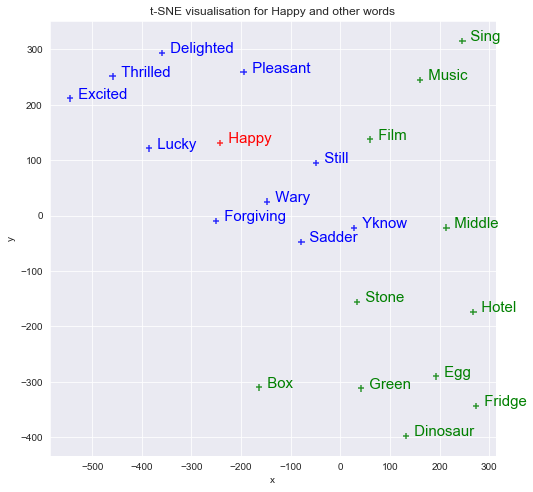

In [97]:
# Figure 17
# t-SNE visualisation of: [happy, 10 most similar words to happy, 11 other words]
# perplexity = 8
tsne_plot(word_vectors, 'happy', ['fridge', 'sing', 'dinosaur', 'film', 'egg', 'box', 'music', 'middle', 'hotel', 'stone', 'green'], 8)

In [98]:
print(Word2Vec_model.wv.similarity('happy', 'fridge'))
print(Word2Vec_model.wv.similarity('happy', 'sing'))
print(Word2Vec_model.wv.similarity('happy', 'dinosaur'))
print(Word2Vec_model.wv.similarity('happy', 'film'))
print(Word2Vec_model.wv.similarity('happy', 'egg'))
print(Word2Vec_model.wv.similarity('happy', 'box'))
print(Word2Vec_model.wv.similarity('happy', 'music'))
print(Word2Vec_model.wv.similarity('happy', 'middle'))
print(Word2Vec_model.wv.similarity('happy', 'hotel'))
print(Word2Vec_model.wv.similarity('happy', 'stone'))
print(Word2Vec_model.wv.similarity('happy', 'green'))
# mean of 11 other words cosine similarity to happy
(0.59514827+0.53780264+0.49106088+0.6037705+0.44058177+0.4384224+0.46181843+0.55759025+0.5040131+0.6305899+0.34105003)/11

0.58845025
0.5205555
0.4609786
0.6081674
0.35920784
0.418716
0.5004586
0.5055306
0.48802876
0.6176193
0.3004967


0.5092589245454545

In [99]:
word_vectors.most_similar('happy')
# mean of cosine similarity of 10 most similar words to happy
(0.8761105537414551+0.8554679155349731+0.8498312830924988+0.8491461277008057+0.8485555648803711+0.8399125933647156+0.8383303880691528+0.8351972103118896+0.8325761556625366+0.832331657409668)/10

0.8457459449768067

t-SNE done! Time elapsed: 0.6412851810455322 seconds
             x           y      words colour
0    77.268661  129.823410      happy    red
1   -54.999260  -18.115063       wary   blue
2   -31.232403   89.921364  forgiving   blue
3   168.861526  329.180786    excited   blue
4   198.650894  129.557632   pleasant   blue
5    83.378738  277.229248   thrilled   blue
6   154.923965  -32.086189      still   blue
7    34.888466 -117.009766      yknow   blue
8    44.701256  -11.472193     sadder   blue
9   -19.347416  373.407074      lucky   blue
10  -24.470467  246.732880  delighted   blue
11   23.785784 -475.057159      water  green
12 -112.561905 -212.271576       sing  green
13    1.422488 -599.745361     orange  green
14  170.517380 -156.713348       film  green
15  -71.973511 -519.121216        egg  green
16 -201.703262   96.965950        joy  green
17    5.361191 -242.651688      music  green
18  162.370224 -373.778046     middle  green
19 -111.673897 -405.912842      hotel  green


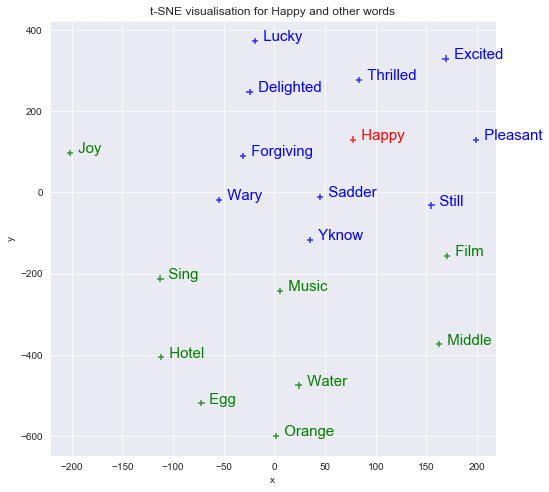

In [100]:
# t-SNE visualisation of: [happy, 10 most similar words to happy, 9 other words]
# perplexity = 10
tsne_plot(word_vectors, 'happy', ['water', 'sing', 'orange', 'film', 'egg', 'joy', 'music', 'middle', 'hotel'], 10)

t-SNE done! Time elapsed: 0.4567418098449707 seconds
             x           y        words  colour
0   151.222092 -129.656647        happy     red
1    60.212082  -81.885651         wary    blue
2    56.400196 -150.391998    forgiving    blue
3   309.435394 -322.613953      excited    blue
4   210.354385  -73.192001     pleasant    blue
5   304.034332 -269.744080     thrilled    blue
6   -49.280514  137.084946        still    blue
7   -23.208828    3.668662        yknow    blue
8    18.038549  -44.640423       sadder    blue
9   193.694092 -213.536423        lucky    blue
10  309.035217 -204.678528    delighted    blue
11 -248.230469  278.642181         film  purple
12 -185.607651  287.042786        movie   green
13 -141.754807  138.108612    defiantly   green
14 -119.751617  284.764252         this   green
15 -300.526276  175.829071      picture   green
16 -288.732086  345.007812   altogether   green
17 -213.946213   96.521240    filmaking   green
18 -365.832672  267.501404  documen

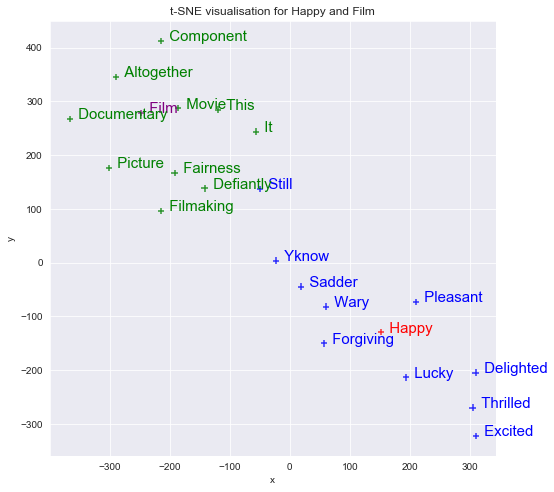

In [121]:
# t-SNE visualisation of: [happy, 10 most similar words to happy, film, 10 most similar words to film]
# perplexity = 5
tsne_plot(word_vectors, 'happy', 'film', 5)

In [102]:
Word2Vec_model.wv.similarity('happy', 'cat')

0.56040055

In [103]:
word_vectors.most_similar('cat')

[('dog', 0.9142175316810608),
 ('mouse', 0.8835711479187012),
 ('puppy', 0.871698260307312),
 ('bug', 0.8668400645256042),
 ('frog', 0.8659522533416748),
 ('monkey', 0.8587619066238403),
 ('chucky', 0.8480398058891296),
 ('rabbit', 0.8403249979019165),
 ('bird', 0.8352481722831726),
 ('hat', 0.8311727643013)]

t-SNE done! Time elapsed: 0.6722002029418945 seconds
             x           y      words  colour
0   132.017227 -313.600769      happy     red
1    72.085464 -359.004517       wary    blue
2   124.097786 -397.737244  forgiving    blue
3    47.220001 -178.683945    excited    blue
4   209.661194 -341.774628   pleasant    blue
5    96.073952 -206.542740   thrilled    blue
6    24.205746 -306.347382      still    blue
7    -9.651800 -365.661560      yknow    blue
8    37.414555 -405.069733     sadder    blue
9   178.449677 -245.607498      lucky    blue
10  151.845535 -171.763687  delighted    blue
11 -162.274231  350.208557        cat  purple
12 -103.807602  321.338989        dog   green
13 -170.216080  438.229248      mouse   green
14 -145.376144  278.944427      puppy   green
15  -37.027283  280.408569        bug   green
16 -131.508804  205.032501       frog   green
17  -28.014572  354.867401     monkey   green
18 -232.980759  273.098694     chucky   green
19  -80.714691  402.326721 

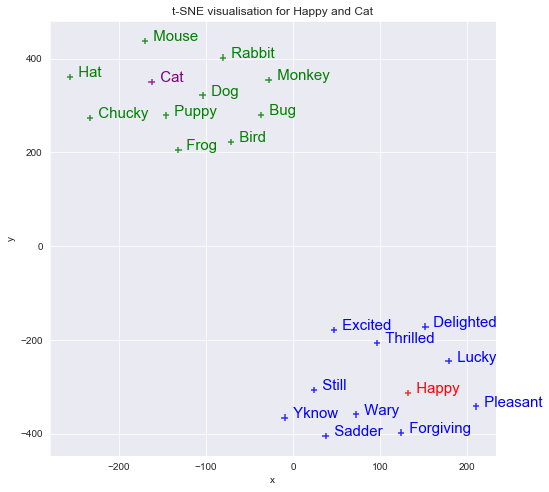

In [104]:
# Figure 16
# t-SNE visualisation of: [happy, 10 most similar words to happy, cat, 10 most similar words to cat]
# perplexity = 8
tsne_plot(word_vectors, 'happy', 'cat', 8)

In [15]:
#least similar words to happy
import sys
all_similarity = word_vectors.most_similar('happy', topn=88584)
last_10 = list(reversed(all_similarity[-10:]))
print(last_10)
# mean of 10 least similar words to happy
(-0.022464819252490997+0.08310854434967041+0.08704235404729843+0.11034659296274185+0.11091198772192001+0.1135990247130394+0.11392997205257416+0.11691470444202423+0.11924747377634048+0.12162584066390991)/10

[('ke', 0.05750851705670357), ('ku', 0.06341096758842468), ('siu', 0.07384679466485977), ('klux', 0.07402834296226501), ('collaborator', 0.07985023409128189), ('klan', 0.08334986865520477), ('cinematographer', 0.087342768907547), ('composer', 0.10332733392715454), ('vittorio', 0.10825438052415848), ('ching', 0.1092933714389801)]


0.09542616754770279

In [106]:
word_dictionary.get('ke')
k=20865
x=0
for i in range(len(w2vdata)):
    for j in range(len(w2vdata[i])):
        if w2vdata[i][j] == k:
            x+=1
x

24

In [107]:
print(Word2Vec_model.wv.similarity('cat', 'happy'))
print(Word2Vec_model.wv.similarity('cat', 'wary'))
print(Word2Vec_model.wv.similarity('cat', 'anxious'))
print(Word2Vec_model.wv.similarity('cat', 'funnily'))
print(Word2Vec_model.wv.similarity('cat', 'forgiving'))
print(Word2Vec_model.wv.similarity('cat', 'lucky'))
print(Word2Vec_model.wv.similarity('cat', 'tearful'))
print(Word2Vec_model.wv.similarity('cat', 'satisfied'))
print(Word2Vec_model.wv.similarity('cat', 'upsetting'))
print(Word2Vec_model.wv.similarity('cat', 'excited'))
print(Word2Vec_model.wv.similarity('cat', 'liking'))
# mean of cosine similarity of happy and 10 most similar words to happy, with cat
(0.5772313+0.5483686+0.46805513+0.5726323+0.4141524+0.50007457+0.56036997+0.5074546+0.5531851+0.4499961+0.540539)/11

0.56040055
0.5274823
0.41685683
0.567474
0.38609618
0.51522815
0.5497831
0.36504266
0.50825095
0.4416136
0.47596076


0.5174599154545455

In [108]:
print(Word2Vec_model.wv.similarity('happy', 'cat'))
print(Word2Vec_model.wv.similarity('happy', 'dog'))
print(Word2Vec_model.wv.similarity('happy', 'doll'))
print(Word2Vec_model.wv.similarity('happy', 'monkey'))
print(Word2Vec_model.wv.similarity('happy', 'puppy'))
print(Word2Vec_model.wv.similarity('happy', 'mouse'))
print(Word2Vec_model.wv.similarity('happy', 'devil'))
print(Word2Vec_model.wv.similarity('happy', 'ghost'))
print(Word2Vec_model.wv.similarity('happy', 'dwarf'))
print(Word2Vec_model.wv.similarity('happy', 'skeleton'))
print(Word2Vec_model.wv.similarity('happy', 'dead'))
# mean of cosine similarity of cat and 10 most similar words to cat, with happy
(0.5772313+0.5938539+0.5219526+0.49709213+0.6051861+0.4996559+0.55653805+0.6318099+0.47627717+0.43766695+0.71225274)/11

0.56040055
0.5800444
0.47437274
0.46712747
0.61768293
0.4938907
0.5678754
0.6215519
0.44097704
0.45542866
0.64982986


0.5554106127272728

### RNN Models for Sentiment Analysis of IMDB film reviews

### Including an implementation of trained Word2Vec word embedding with RNN

### First set up the word embedding into the correct format for the model

In [23]:
# define embedding dictionary required for implementing word embedding
import os
embedding_dictionary = {}

file = open(os.path.join('', 'word2vec_imdb.txt'), encoding = 'utf-8')
for row in file:
    wordvec = row.split()
    word = wordvec[0]
    vector = np.asarray(wordvec[1:])
    embedding_dictionary[word] = vector
file.close()

In [24]:
embedding_dictionary['the']

array(['-0.43885502', '-0.65559906', '0.3736945', '-0.6085809',
       '-0.20766073', '0.21110918', '0.21070324', '0.28228104',
       '-0.30489442', '-0.19336739', '-0.25801593', '0.14859346',
       '-0.3574648', '0.3269817', '0.028816821', '0.08019912',
       '-0.31602553', '-0.5771742', '-0.41668582', '-0.34196278',
       '0.43540972', '-0.62646896', '0.0622666', '-0.38193172',
       '0.06219827', '-0.37314644', '0.12881994', '-0.23254427',
       '-0.28568417', '-0.5034032', '-0.020173555', '-0.16249423'],
      dtype='<U12')

In [25]:
# load data (again)
vocab_size= 10002
(train_data, train_labels), (test_data, test_labels) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)
print(train_data[0])
print(test_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1, 591, 202, 14, 31, 6, 717, 10, 10, 2, 2, 5, 4, 360, 7, 4,

In [26]:
# fix the issue with train data having +3 misaligned index
# turn all 1,2 into 0 (recall that 3 is never used so not needed to change any 3s into 0s)
# also subtract 3 from all numbers greater than 3 
# e.g. 'the' is indexed by 1 but in the data it is represented by 4 so 4-3=1
for i in range(len(train_data)):
    for j in range(len(train_data[i])):
        if train_data[i][j] == 1:
            train_data[i][j] = 0
        if train_data[i][j] == 2:
            train_data[i][j] = 0
        if train_data[i][j] > 3:
            train_data[i][j] = train_data[i][j] - 3
        
print(train_data[0])

for i in range(len(test_data)):
    for j in range(len(test_data[i])):
        if test_data[i][j] == 1:
            test_data[i][j] = 0
        if test_data[i][j] == 2:
            test_data[i][j] = 0
        if test_data[i][j] > 3:
            test_data[i][j] = test_data[i][j] - 3
        
print(test_data[0])

[0, 11, 19, 13, 40, 527, 970, 1619, 1382, 62, 455, 4465, 63, 3938, 1, 170, 33, 253, 2, 22, 97, 40, 835, 109, 47, 667, 0, 6, 32, 477, 281, 2, 147, 1, 169, 109, 164, 0, 333, 382, 36, 1, 169, 4533, 1108, 14, 543, 35, 10, 444, 1, 189, 47, 13, 3, 144, 2022, 16, 11, 19, 1, 1917, 4610, 466, 1, 19, 68, 84, 9, 13, 40, 527, 35, 73, 12, 10, 1244, 1, 19, 14, 512, 14, 9, 13, 623, 15, 0, 2, 59, 383, 9, 5, 313, 5, 103, 2, 1, 2220, 5241, 13, 477, 63, 3782, 30, 1, 127, 9, 13, 35, 616, 2, 22, 121, 48, 33, 132, 45, 22, 1412, 30, 3, 19, 9, 212, 25, 74, 49, 2, 11, 404, 13, 79, 0, 5, 1, 104, 114, 5949, 12, 253, 1, 0, 4, 3763, 2, 720, 33, 68, 40, 527, 473, 23, 397, 314, 43, 4, 1, 0, 1026, 10, 101, 85, 1, 378, 12, 294, 95, 29, 2068, 53, 23, 138, 3, 191, 7483, 15, 1, 223, 19, 18, 131, 473, 23, 477, 2, 141, 27, 5532, 15, 48, 33, 25, 221, 89, 22, 101, 1, 223, 62, 13, 35, 1331, 85, 9, 13, 280, 2, 13, 4469, 110, 100, 29, 12, 13, 5342, 16, 175, 29]
[0, 588, 199, 11, 28, 3, 714, 7, 7, 0, 0, 2, 1, 357, 4, 1, 174, 575

In [27]:
embedding_size=32
num_words = len(embedding_dictionary)
embedding_matrix = np.zeros((num_words, embedding_size))
for word, rank in word_dictionary.items():
    if rank < 77600:
        embedding_vector = embedding_dictionary.get(word)
        if embedding_vector is not None:
            embedding_matrix[rank] = embedding_vector
embedding_matrix[990]

array([-0.40508267, -0.42714086,  0.4648127 , -0.29134315, -0.19454311,
        0.23153429, -0.13736628, -0.03695901,  0.10365509, -0.38745952,
       -0.04281895,  0.8792095 , -0.3986314 ,  0.29038528,  0.21364178,
        0.64855564, -0.97886235, -0.5481147 , -0.0709258 , -0.11278995,
        0.9293364 ,  0.10333926, -0.24014665, -0.41025496, -0.55051255,
       -0.39307687,  0.42002973, -0.5052565 ,  0.02550388,  0.11256489,
        0.29078367,  0.3465655 ])

In [28]:
# check the dictionaries and indexes are aligned
print(word_dictionary.get('and'))
print(embedding_dictionary['and'])
print(embedding_matrix[2])
print(index_2_word.get(2))
print(index_2_word.get(1))

2
['-0.15758215' '-0.49031952' '0.17812233' '-0.5728496' '-0.5495529'
 '-0.107741214' '-0.03818371' '0.17866006' '-0.31291702' '-0.13310689'
 '-0.25821942' '0.3421972' '-0.20021625' '0.47946692' '-0.20988369'
 '0.3249387' '-0.35236502' '-0.34495956' '-0.2365166' '-0.18431298'
 '0.1925333' '-0.6254402' '0.09600365' '-0.20226125' '-0.0044667963'
 '0.029320389' '-0.10221107' '-0.20565222' '-0.5067896' '-0.19257659'
 '-0.048774224' '-0.2561538']
[-0.15758215 -0.49031952  0.17812233 -0.5728496  -0.5495529  -0.10774121
 -0.03818371  0.17866006 -0.31291702 -0.13310689 -0.25821942  0.3421972
 -0.20021625  0.47946692 -0.20988369  0.3249387  -0.35236502 -0.34495956
 -0.2365166  -0.18431298  0.1925333  -0.6254402   0.09600365 -0.20226125
 -0.0044668   0.02932039 -0.10221107 -0.20565222 -0.5067896  -0.19257659
 -0.04877422 -0.2561538 ]
and
the


In [29]:
# total number of word vectors in embedding
num_words

77747

In [30]:
print(word_vectors['test'])
embedding_dictionary.get('test')

[-0.6322642  -0.59592956 -0.296901    0.09176988 -0.06719113  0.22743057
 -0.23725443  0.41027132  0.1794201   0.1219973   0.07040782  0.2840465
 -0.5085847   0.46088266  0.00212271  0.2669246  -0.7204288  -0.9369016
 -0.5848987  -0.03546312  0.25562966 -0.5000416   0.19205813 -0.24266659
  0.1859186   0.1950035  -0.04233644  0.16908225 -0.49290916 -0.21431935
  0.2336341   0.79546744]


array(['-0.6322642', '-0.59592956', '-0.296901', '0.09176988',
       '-0.06719113', '0.22743057', '-0.23725443', '0.41027132',
       '0.1794201', '0.121997304', '0.070407815', '0.2840465',
       '-0.5085847', '0.46088266', '0.002122711', '0.2669246',
       '-0.7204288', '-0.9369016', '-0.5848987', '-0.035463125',
       '0.25562966', '-0.5000416', '0.19205813', '-0.24266659',
       '0.1859186', '0.1950035', '-0.04233644', '0.16908225',
       '-0.49290916', '-0.21431935', '0.2336341', '0.79546744'],
      dtype='<U12')

### Model 1: Simple Recurrent Neural Network (SRNN) for IMDB film reviews using trained Word2Vec word embedding

In [57]:
vocab_size = 10002 
#only consider the top 10,000 ranked words 
num_words = len(embedding_dictionary)
max_words = 500
embedding_size=32
train_data = sequence.pad_sequences(train_data, maxlen=max_words)
test_data = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from keras.initializers import Constant

model_w2v = Sequential()
# initialise embedding layer with the embedding matrix and make trainable=False so that the values are fixed
model_w2v.add(Embedding(num_words, embedding_size, embeddings_initializer=Constant(embedding_matrix), input_length=max_words, trainable=False))
model_w2v.add(SimpleRNN(100,activation="tanh"))
model_w2v.add(Dense(1, activation='sigmoid'))

# Figure 18
print(model_w2v.summary())

model_w2v.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 500, 32)           2487904   
_________________________________________________________________
simple_rnn_8 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 101       
Total params: 2,501,305
Trainable params: 13,401
Non-trainable params: 2,487,904
_________________________________________________________________
None


In [58]:
batch_size = 500
num_epochs = 10

valid_data, valid_labels = train_data[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data[batch_size:], train_labels[batch_size:]


# Train Model
history_w2v = model_w2v.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 38s 2ms/step - loss: 0.6346 - acc: 0.6358 - val_loss: 0.5993 - val_acc: 0.6780
Epoch 2/10
24500/24500 [==============================] - 36s 1ms/step - loss: 0.5313 - acc: 0.7482 - val_loss: 0.4620 - val_acc: 0.7960
Epoch 3/10
24500/24500 [==============================] - 36s 1ms/step - loss: 0.5700 - acc: 0.7114 - val_loss: 0.4607 - val_acc: 0.8020
Epoch 4/10
24500/24500 [==============================] - 36s 1ms/step - loss: 0.4834 - acc: 0.7802 - val_loss: 0.4355 - val_acc: 0.8020
Epoch 5/10
24500/24500 [==============================] - 30s 1ms/step - loss: 0.5187 - acc: 0.7536 - val_loss: 0.4491 - val_acc: 0.8040
Epoch 6/10
24500/24500 [==============================] - 32s 1ms/step - loss: 0.4863 - acc: 0.7765 - val_loss: 0.4489 - val_acc: 0.7920
Epoch 7/10
24500/24500 [==============================] - 34s 1ms/step - loss: 0.4558 - acc: 0.7966 - val_loss: 0.4107 - val_acc: 

In [59]:
# Test Accuracy of SRNN Model 1:
scores_w2v = model_w2v.evaluate(test_data, test_labels, verbose=0)
print('Test accuracy:', scores_w2v[1])

Test accuracy: 0.78384


In [60]:
#average of 5 test accuracies
print('Average Test Accuracy:',(0.78416+0.77792+0.7758+0.77028+0.78372)/5)

Average Test Accuracy: 0.7783760000000001


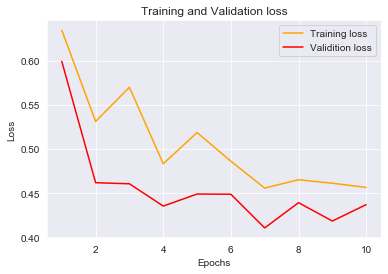

<Figure size 432x288 with 0 Axes>

In [61]:
# Performance Graphs:
history_dict_w2v = history_w2v.history
loss_value = history_dict_w2v['loss']
val_loss_value = history_dict_w2v['val_loss']
acc = history_dict_w2v['acc']
epochs = range(1,len(acc) + 1)

# Figure 19 a
plt.plot(epochs, loss_value, 'orange', label='Training loss')
plt.plot(epochs, val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

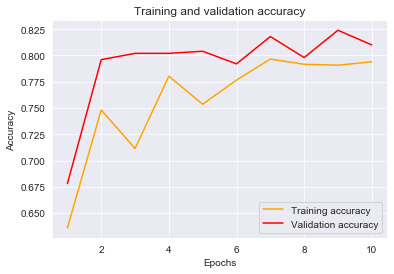

In [62]:
acc_values = history_dict_w2v['acc']
val_acc_values = history_dict_w2v['val_acc']

# Figure 19 b
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# may indicate under fitting as 
# train loss > validation loss
# train accuracy < validation accuracy

In [63]:
# Benchmark Reviews

#sarcasm
test_review1 = ['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
test_review2 = ['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
#negation handling
test_review3 = ['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
test_review4 = ['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
test_review5 = ['i', 'do', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
test_review6 = ['i', 'do', 'not', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
#ambiguous language
test_review7 = ['strange', 'characters', 'and', 'a', 'unique', 'story', 'line', 'one', 'of', 'the', 'more', 'questionable', 'films', 'but', 'still', 'entertaining']
test_review8 = ['a', 'typical', 'action', 'film', 'with', 'a', 'predictable', 'storyline']
#slang
test_review9 = ['omg', 'it', 'was', 'a', 'sick', 'film', 'the', 'acting', 'was', 'on', 'point', 'and', 'i', 'was', 'shook', 'at', 'the', 'ending']
test_review10 = ['wow', 'this', 'film', 'really', 'sucked', 'sorry', 'but', 'got', 'to', 'be', 'brutal']



test_reviews = [test_review1, test_review2, test_review3, test_review4, test_review5, test_review6, test_review7, test_review8, test_review9, test_review10]

def sentence_2_sequence(sentence): #function to convert sentences of words to a vector containing their word ranks 
    sequence = []
    for word in sentence:
        if word_dictionary[word] < 77747: # so we don't include words ranked lower than 10,000
            sequence.append(word_dictionary[word])
    return(np.array(sequence))

def pad_sequence(x): 
    padded_seq = sequence.pad_sequences(x, maxlen=max_words) # makes sequences length 500
    return(padded_seq)

review1_sequence = sentence_2_sequence(test_review1)
review2_sequence = sentence_2_sequence(test_review2)
review3_sequence = sentence_2_sequence(test_review3)
review4_sequence = sentence_2_sequence(test_review4)
review5_sequence = sentence_2_sequence(test_review5)
review6_sequence = sentence_2_sequence(test_review6)
review7_sequence = sentence_2_sequence(test_review7)
review8_sequence = sentence_2_sequence(test_review8)
review9_sequence = sentence_2_sequence(test_review9)
review10_sequence = sentence_2_sequence(test_review10)

reviews = [review1_sequence, review2_sequence, review3_sequence, review4_sequence, review5_sequence, review6_sequence, review7_sequence, review8_sequence, review9_sequence, review10_sequence]
test_reviews_converted = pad_sequence(reviews)


x=test_reviews_converted[:batch_size]
results_w2v = model_w2v.predict(x)

for i in range(len(results_w2v)):
    # since values close to 0 have negative sentiment
    if results_w2v[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.2 <= results_w2v[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results_w2v[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results_w2v[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results_w2v[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.8 <= results_w2v[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
        

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has very negative sentiment
Model prediction = [0.07471526]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has negative sentiment
Model prediction = [0.24163994]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has very negative sentiment
Model prediction = [0.17453101]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has negative sentiment
Model prediction = [0.42568213]
Film review 5 :
['i', 'do', 'think', 'this', 'was', 'a

### Model 2: Gated Recurrent Unit (GRU) for IMDB film reviews using trained Word2Vec word embedding

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           2487904   
_________________________________________________________________
gru_1 (GRU)                  (None, 100)               39900     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 2,527,905
Trainable params: 40,001
Non-trainable params: 2,487,904
_________________________________________________________________
None
Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 136s 6ms/step - loss: 0.6398 - acc: 0.6320 - val_loss: 0.5808 - val_acc: 0.6900
Epoch 2/10
24500/24500 [==============================] - 81s 3ms/step - loss: 0.5000 - acc: 0.7647 - val_loss: 0.3599 - val_acc: 0.8440
Epoch 3/10
24500/24500 [==============================] - 91s 4

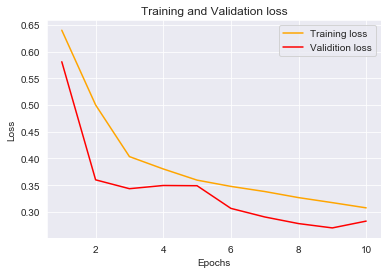

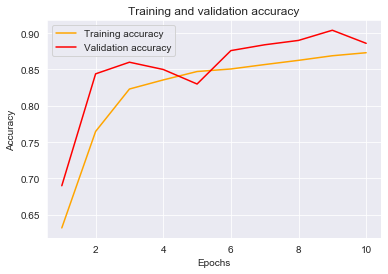

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has negative sentiment
Model prediction = [0.39518547]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has negative sentiment
Model prediction = [0.25288793]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has negative sentiment
Model prediction = [0.43714327]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has very positive sentiment
Model prediction = [0.8688623]
Film review 5 :
['i', 'do', 'think', 'this', 'was', 'a', 've

In [29]:
vocab_size = 10002 
#only consider the top 10,000 ranked words 
num_words = len(embedding_dictionary)
max_words = 500
embedding_size=32
train_data = sequence.pad_sequences(train_data, maxlen=max_words)
test_data = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, GRU, Dense, Dropout
from keras.initializers import Constant

model_gru_w2v = Sequential()
model_gru_w2v.add(Embedding(num_words, embedding_size, embeddings_initializer=Constant(embedding_matrix), input_length=max_words, trainable=False))
model_gru_w2v.add(GRU(100,activation="tanh"))
model_gru_w2v.add(Dense(1, activation='sigmoid'))

# Figure 20
# Summary of parameters:
print(model_gru_w2v.summary())

model_gru_w2v.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 500
num_epochs = 10

valid_data, valid_labels = train_data[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data[batch_size:], train_labels[batch_size:]


# Train Model
history_gru_w2v = model_gru_w2v.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

# Test Accuracy:
scores_gru_w2v = model_gru_w2v.evaluate(test_data, test_labels, verbose=0)
print('Test accuracy:', scores_gru_w2v[1])
# average test accuracy
print('Average Test Accuracy:',(0.85968+0.87956+0.87308+0.87636+0.86408)/5)


# Performance Graphs:
history_dict_gru_w2v = history_gru_w2v.history
loss_value = history_dict_gru_w2v['loss']
val_loss_value = history_dict_gru_w2v['val_loss']
acc = history_dict_gru_w2v['acc']
epochs = range(1,len(acc) + 1)

# Figure 21 a
plt.plot(epochs, loss_value, 'orange', label='Training loss')
plt.plot(epochs, val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history_dict_gru_w2v['acc']
val_acc_values = history_dict_gru_w2v['val_acc']

# Figure 21 b
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Test Benchmark Reviews:

#sarcasm
test_review1 = ['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
test_review2 = ['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
#negation handling
test_review3 = ['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
test_review4 = ['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
test_review5 = ['i', 'do', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
test_review6 = ['i', 'do', 'not', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
#ambiguous language
test_review7 = ['strange', 'characters', 'and', 'a', 'unique', 'story', 'line', 'one', 'of', 'the', 'more', 'questionable', 'films', 'but', 'still', 'entertaining']
test_review8 = ['a', 'typical', 'action', 'film', 'with', 'a', 'predictable', 'storyline']
#slang
test_review9 = ['omg', 'it', 'was', 'a', 'sick', 'film', 'the', 'acting', 'was', 'on', 'point', 'and', 'i', 'was', 'shook', 'at', 'the', 'ending']
test_review10 = ['wow', 'this', 'film', 'really', 'sucked', 'sorry', 'but', 'got', 'to', 'be', 'brutal']

test_reviews = [test_review1, test_review2, test_review3, test_review4, test_review5, test_review6, test_review7, test_review8, test_review9, test_review10]

def sentence_2_sequence(sentence): #function to convert sentences of words to a vector containing their word ranks 
    sequence = []
    for word in sentence:
        if word_dictionary[word] < 77747: # so we don't include words ranked lower than 10,000
            sequence.append(word_dictionary[word])
    return(np.array(sequence))

def pad_sequence(x): 
    padded_seq = sequence.pad_sequences(x, maxlen=max_words) # makes sequences length 500
    return(padded_seq)

review1_sequence = sentence_2_sequence(test_review1)
review2_sequence = sentence_2_sequence(test_review2)
review3_sequence = sentence_2_sequence(test_review3)
review4_sequence = sentence_2_sequence(test_review4)
review5_sequence = sentence_2_sequence(test_review5)
review6_sequence = sentence_2_sequence(test_review6)
review7_sequence = sentence_2_sequence(test_review7)
review8_sequence = sentence_2_sequence(test_review8)
review9_sequence = sentence_2_sequence(test_review9)
review10_sequence = sentence_2_sequence(test_review10)

reviews = [review1_sequence, review2_sequence, review3_sequence, review4_sequence, review5_sequence, review6_sequence, review7_sequence, review8_sequence, review9_sequence, review10_sequence]
test_reviews_converted = pad_sequence(reviews)


x=test_reviews_converted[:batch_size]
results_w2v = model_gru_w2v.predict(x)

for i in range(len(results_w2v)):
    # since values close to 0 have negative sentiment
    if results_w2v[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.2 <= results_w2v[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results_w2v[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results_w2v[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results_w2v[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.8 <= results_w2v[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    

In [38]:
# average test accuracy of GRU Model 2
print('Average Test Accuracy:',(0.85968+0.87956+0.87308+0.87636+0.86408)/5)

Average Test Accuracy: 0.870552


### Model 3: Long Short-Term Memory (LSTM) for IMDB film reviews using trained Word2Vec word embedding

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 500, 32)           2487904   
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 101       
Total params: 2,541,205
Trainable params: 53,301
Non-trainable params: 2,487,904
_________________________________________________________________
None
Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 208s 8ms/step - loss: 0.6482 - acc: 0.6381 - val_loss: 0.6301 - val_acc: 0.6920
Epoch 2/10
24500/24500 [==============================] - 190s 8ms/step - loss: 0.5855 - acc: 0.7150 - val_loss: 0.5177 - val_acc: 0.7680
Epoch 3/10
24500/24500 [==============================] - 155s

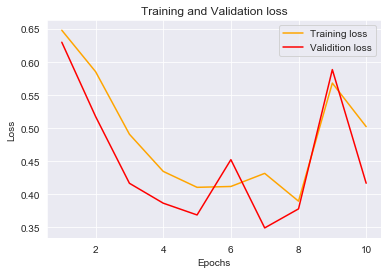

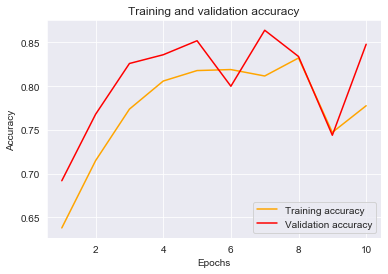

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has positive sentiment
Model prediction = [0.6236302]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has negative sentiment
Model prediction = [0.39669454]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has positive sentiment
Model prediction = [0.60794204]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has very positive sentiment
Model prediction = [0.8173573]
Film review 5 :
['i', 'do', 'think', 'this', 'was', 'a', 'ver

In [35]:
vocab_size = 10002 
#only consider the top 10,000 ranked words 
num_words = len(embedding_dictionary)
max_words = 500
embedding_size=32
train_data = sequence.pad_sequences(train_data, maxlen=max_words)
test_data = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from keras.initializers import Constant

model_lstm_w2v = Sequential()
model_lstm_w2v.add(Embedding(num_words, embedding_size, embeddings_initializer=Constant(embedding_matrix), input_length=max_words, trainable=False))
model_lstm_w2v.add(LSTM(100,activation="tanh"))
model_lstm_w2v.add(Dense(1, activation='sigmoid'))

# Figure 22
# Summary of parameters:
print(model_lstm_w2v.summary())

model_lstm_w2v.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 500
num_epochs = 10

# Train Model
valid_data, valid_labels = train_data[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data[batch_size:], train_labels[batch_size:]



history_lstm_w2v = model_lstm_w2v.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

# Test Accuracy:
scores_lstm_w2v = model_lstm_w2v.evaluate(test_data, test_labels, verbose=0)
print('Test accuracy:', scores_lstm_w2v[1])
# average test accuracy
print('Average Test Accuracy:',(0.82296+0.84824+0.84224+ 0.84336+0.81324)/5)


# Performace Graphs: 
history_dict_lstm_w2v = history_lstm_w2v.history
loss_value = history_dict_lstm_w2v['loss']
val_loss_value = history_dict_lstm_w2v['val_loss']
acc = history_dict_lstm_w2v['acc']
epochs = range(1,len(acc) + 1)

# Figure 23 a 
plt.plot(epochs, loss_value, 'orange', label='Training loss')
plt.plot(epochs, val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf()

acc_values = history_dict_lstm_w2v['acc']
val_acc_values = history_dict_lstm_w2v['val_acc']

# Figure 23 b
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Test Benchmark Reviews:
x=test_reviews_converted[:batch_size]
results_w2v = model_lstm_w2v.predict(x)

for i in range(len(results_w2v)):
    # since values close to 0 have negative sentiment
    if results_w2v[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.2 <= results_w2v[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results_w2v[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results_w2v[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results_w2v[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.8 <= results_w2v[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])

In [14]:
# average test accuracy of LSTM Model 3 
print('Average Test Accuracy:',(0.82296+0.84824+0.84224+ 0.84336+0.81324)/5)

Average Test Accuracy: 0.8340080000000001


### Model 5: Same as Model 1 but with 1000 word limit instead of 500

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 1000, 32)          2487904   
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 100)               13300     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 101       
Total params: 2,501,305
Trainable params: 13,401
Non-trainable params: 2,487,904
_________________________________________________________________
None
Train on 24500 samples, validate on 500 samples
Epoch 1/10
24500/24500 [==============================] - 65s 3ms/step - loss: 0.6345 - acc: 0.6289 - val_loss: 0.4811 - val_acc: 0.7880
Epoch 2/10
24500/24500 [==============================] - 60s 2ms/step - loss: 0.5762 - acc: 0.7111 - val_loss: 0.5796 - val_acc: 0.7140
Epoch 3/10
24500/24500 [==============================] - 51s 2m

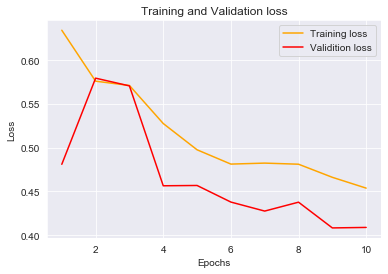

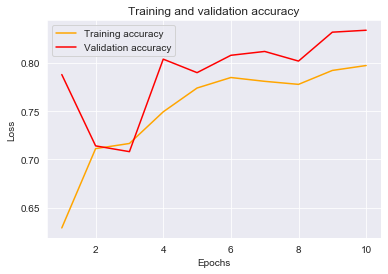

Film review 1 :
['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
this review has very negative sentiment
Model prediction = [0.10667244]
Film review 2 :
['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
this review has negative sentiment
Model prediction = [0.25713402]
Film review 3 :
['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
this review has very negative sentiment
Model prediction = [0.16808227]
Film review 4 :
['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
this review has negative sentiment
Model prediction = [0.32197666]
Film review 5 :
['i', 'do', 'think', 'this', 'was', 'a

In [43]:
# vectorise every review and make all reviews the same length 1000, reviews shorter than 1000 will be filled (padded) with 0s
max_words = 1000
num_words = len(embedding_dictionary)
train_data_pad = sequence.pad_sequences(train_data, maxlen=max_words)
test_data_pad = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, Dropout
from keras.initializers import Constant

embedding_size=32
model_w2v1000=Sequential()
model_w2v1000.add(Embedding(num_words, embedding_size, embeddings_initializer=Constant(embedding_matrix), input_length=max_words, trainable=False))
model_w2v1000.add(SimpleRNN(100))
model_w2v1000.add(Dense(1, activation='sigmoid'))

print(model_w2v1000.summary())

model_w2v1000.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 500
num_epochs = 10

valid_data, valid_labels = train_data_pad[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data_pad[batch_size:], train_labels[batch_size:]

# Train Model
history = model_w2v1000.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

# Test Accuracy
scores = model_w2v1000.evaluate(test_data_pad, test_labels, verbose=0)
print('Test accuracy:', scores[1])
# average test accuracy
print('Average Test Accuracy:',(0.781+0.59476+0.78392+0.6624+0.79668)/5)

history_dict = history.history
loss_value = history_dict['loss']
val_loss_value = history_dict['val_loss']

acc = history_dict['acc']
epochs = range(1,len(acc) + 1)


plt.plot(epochs,loss_value, 'orange', label='Training loss')
plt.plot(epochs,val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# indicates over fitting as 
# train loss < validation loss
# train accuracy > validation accuracy

# Benchmark Reviews
#sarcasm
test_review1 = ['watch', 'this', 'film', 'if', 'you', 'love', 'being', 'bored', 'and', 'not', 'invested', 'in', 'the', 'characters']
test_review2 = ['it', 'was', 'better', 'than', 'spending', 'an', 'hour', 'and', 'a', 'half', 'staring', 'at', 'a', 'brick', 'wall', 'in', 'all', 'seriousness', 'its', 'a', 'must', 'watch']
#negation handling
test_review3 = ['this', 'movie', 'was', 'not', 'fantastic', 'i', 'didnt', 'love', 'the', 'catchphrases', 'and', 'the', 'directing', 'wasnt', 'great', 'a', 'mediocre', 'film']
test_review4 = ['this', 'movie', 'was', 'fantastic', 'i', 'loved', 'the', 'catchphrases', 'and', 'the', 'directing', 'was', 'great', 'was', 'an', 'excellent', 'film']
test_review5 = ['i', 'do', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
test_review6 = ['i', 'do', 'not', 'think', 'this', 'was', 'a', 'very', 'good', 'film']
#ambiguous language
test_review7 = ['strange', 'characters', 'and', 'a', 'unique', 'story', 'line', 'one', 'of', 'the', 'more', 'questionable', 'films', 'but', 'still', 'entertaining']
test_review8 = ['a', 'typical', 'action', 'film', 'with', 'a', 'predictable', 'storyline']
#slang
test_review9 = ['omg', 'it', 'was', 'a', 'sick', 'film', 'the', 'acting', 'was', 'on', 'point', 'and', 'i', 'was', 'shook', 'at', 'the', 'ending']
test_review10 = ['wow', 'this', 'film', 'really', 'sucked', 'sorry', 'but', 'got', 'to', 'be', 'brutal']


test_reviews = [test_review1, test_review2, test_review3, test_review4, test_review5, test_review6, test_review7, test_review8, test_review9, test_review10]

def sentence_2_sequence(sentence): #function to convert sentences of words to a vector containing their word ranks 
    sequence = []
    for word in sentence:
        if word_dictionary[word] < 77747: # so we don't include words ranked lower than 77747
            sequence.append(word_dictionary[word]) #due to misalignment need to add 3 to the index 
    return(np.array(sequence))

def pad_sequence(x): 
    padded_seq = sequence.pad_sequences(x, maxlen=max_words) # makes sequences length 500
    return(padded_seq)

review1_sequence = sentence_2_sequence(test_review1)
review2_sequence = sentence_2_sequence(test_review2)
review3_sequence = sentence_2_sequence(test_review3)
review4_sequence = sentence_2_sequence(test_review4)
review5_sequence = sentence_2_sequence(test_review5)
review6_sequence = sentence_2_sequence(test_review6)
review7_sequence = sentence_2_sequence(test_review7)
review8_sequence = sentence_2_sequence(test_review8)
review9_sequence = sentence_2_sequence(test_review9)
review10_sequence = sentence_2_sequence(test_review10)

reviews = [review1_sequence, review2_sequence, review3_sequence, review4_sequence, review5_sequence, review6_sequence, review7_sequence, review8_sequence, review9_sequence, review10_sequence]
test_reviews_converted = pad_sequence(reviews)


x=test_reviews_converted[:batch_size]
results = model_w2v1000.predict(x)

for i in range(len(results)):
    # since values close to 0 have negative sentiment
    if results[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.2 <= results[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results[i])
    elif 0.8 <= results[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results[i])

### Bidirection LSTM model (not used in project)

In [1]:
vocab_size = 10002 
#only consider the top 10,000 ranked words 
num_words = len(embedding_dictionary)
max_words = 500
embedding_size=32
train_data = sequence.pad_sequences(train_data, maxlen=max_words)
test_data = sequence.pad_sequences(test_data, maxlen=max_words)

from keras import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from keras.initializers import Constant

model_bd_w2v = Sequential()
model_bd_w2v.add(Embedding(num_words, embedding_size, embeddings_initializer=Constant(embedding_matrix), input_length=max_words, trainable=False))
model_bd_w2v.add(layers.Bidirectional(layers.LSTM(20, return_sequences=True)))
model_bd_w2v.add(layers.Bidirectional(layers.LSTM(20)))
#forward_layer = LSTM(100, return_sequences=True)
#backward_layer = LSTM(100, activation='tanh', return_sequences=True, go_backwards=True)
#model_bd_w2v.add(Bidirectional(forward_layer, backward_layer, input_shape=(32, 100)))
model_bd_w2v.add(Dense(1, activation='sigmoid'))

# Summary of parameters:
print(model_bd_w2v.summary())

model_bd_w2v.compile(loss='binary_crossentropy', 
             optimizer='adam', 
             metrics=['accuracy'])

batch_size = 500
num_epochs = 10

valid_data, valid_labels = train_data[:batch_size], train_labels[:batch_size]
train2_data, train2_labels = train_data[batch_size:], train_labels[batch_size:]


# Train Model
history_bd_w2v = model_bd_w2v.fit(train2_data, train2_labels, validation_data=(valid_data, valid_labels), batch_size=batch_size, epochs=num_epochs)

# Test Accuracy:
scores_bd_w2v = model_bd_w2v.evaluate(test_data, test_labels, verbose=0)
print('Test accuracy:', scores_bd_w2v[1])


# Performace Graphs:
history_dict_bd_w2v = history_bd_w2v.history
loss_value = history_dict_bd_w2v['loss']
val_loss_value = history_dict_bd_w2v['val_loss']
acc = history_dict_bd_w2v['acc']


epochs = range(1,len(acc) + 1)


plt.plot(epochs, loss_value, 'orange', label='Training loss')
plt.plot(epochs, val_loss_value, 'red', label='Validition loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

acc_values = history_dict_bd_w2v['acc']
val_acc_values = history_dict_bd_w2v['val_acc']

plt.plot(epochs, acc, 'orange', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'red', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Test Benchmark Reviews:
x=test_reviews_converted[:batch_size]
results_w2v = model_bd_w2v.predict(x)

for i in range(len(results_w2v)):
    # since values close to 0 have negative sentiment
    if results_w2v[i] < 0.2:
        print('Film review', i+1, ':')
        print(test_reviews[i], 'this review has very negative sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.2 <= results_w2v[i] < 0.45:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has negative sentiment', sep='\n') 
        print('Model prediction =', results_w2v[i])
    # values close to 0.5 have neutral sentiment
    elif 0.45 <= results_w2v[i] < 0.55:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has a neutral sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    # values close to 1 have positive sentiment
    elif 0.55 <= results_w2v[i] < 0.8:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])
    elif 0.8 <= results_w2v[i] <= 1:
        print('Film review', i+1, ':')
        print(test_reviews[i],'this review has very positive sentiment', sep='\n')
        print('Model prediction =', results_w2v[i])

NameError: name 'embedding_dictionary' is not defined